<a href="https://colab.research.google.com/github/Pablokill2004/Cloud-AppGG/blob/main/demos/SP1_02_Demo_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEMO #02

What you will learn:


*   How to manipulate Datasets with Pandas
*   What is Tensorflow and how to use it
*   How to create Neural Networks for Regression and Classification Tasks



# Pandas (Dataset Manipulation)

"*pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.*"

[Panda's Official Documentation](https://pandas.pydata.org)

-----

Pandas is a powerful library used to manipulate and analyze data. This library imitates R's philosophy and Sintax (both are very similar!)

Pandas is powerful at **manipulating structured data**, so keep in mind this library will shine with table-looking shaped datasets.
In few lines, you can do a lot of stuff!

Advantages:
* Provides efficient and optimized ways to manipulate data
* Supports multiple file formats
* Can easily merge, divide, join, filter and other type of operations in a similar fashion to SQL!

Limitaitons:
* Can only deal with structured data

Recommended Resources:
* [Official Documentation](https://pandas.pydata.org/docs/)
* [Geeksforgeeks](https://www.geeksforgeeks.org/pandas-tutorial/)
* [w3Schools](https://www.w3schools.com/python/pandas/default.asp)


## Loading Dataset

In [ ]:
'''
All the information regarding the dataset used for this demo can be found in the following link:
https://archive.ics.uci.edu/ml/datasets/Computer+Hardware
'''

# Getting Dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data

--2025-02-05 00:54:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘machine.data’

machine.data            [ <=>                ]   8.52K  --.-KB/s    in 0s      

2025-02-05 00:54:31 (115 MB/s) - ‘machine.data’ saved [8726]



In [ ]:
# For dataset manipulation
import pandas as pd

# Loading Dataset and have a glimpse about it
column_names = ['Vendor','Model','MYCT','MMIN','MMAX',
                'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']

raw_dataset = pd.read_csv("machine.data", names=column_names,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

## .describe()

In [ ]:
# Brief Statistical Summary of the dataset
raw_dataset.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


## .head() and .tail()

In [ ]:
# Summary of the dataset (takes the top N rows)
raw_dataset.head(n=10)

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
5,amdahl,470v/b,26,8000,32000,64,8,32,318,290
6,amdahl,580-5840,23,16000,32000,64,16,32,367,381
7,amdahl,580-5850,23,16000,32000,64,16,32,489,381
8,amdahl,580-5860,23,16000,64000,64,16,32,636,749
9,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238


In [ ]:
# Summary of the dataset (takes the bottom N rows)
raw_dataset.tail(n=5)

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47
208,wang,vs-90,480,1000,4000,0,0,0,45,25


## Shape

In [ ]:
# Shape is a fancy way of calling Dataset's dimension
raw_dataset.shape

(209, 10)

## Column Manipulation

### Extract Column

In [ ]:
# Like a dictionary, pass the EXACT name of the column to extract one column
raw_dataset["Vendor"]

,Vendor
0,adviser
1,amdahl
2,amdahl
3,amdahl
4,amdahl
...,...
204,sperry
205,sperry
206,sratus
207,wang


### Add column



In [ ]:
# To extract multiple, use an array instead
raw_dataset["One"] = 1
raw_dataset

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP,One
0,adviser,32/60,125,256,6000,256,16,128,198,199,1
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253,1
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253,1
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253,1
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132,1
...,...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37,1
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50,1
206,sratus,32,125,2000,8000,0,2,14,52,41,1
207,wang,vs-100,480,512,8000,32,0,0,67,47,1


### Delete Column


In [ ]:
raw_dataset.pop("One")
raw_dataset

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


### Column Values

In [ ]:
# Check all the unique values
raw_dataset["Vendor"].unique()

array(['adviser', 'amdahl', 'apollo', 'basf', 'bti', 'burroughs', 'c.r.d',
       'cdc', 'cambex', 'dec', 'dg', 'formation', 'four-phase', 'gould',
       'hp', 'harris', 'honeywell', 'ibm', 'ipl', 'magnuson', 'microdata',
       'nas', 'ncr', 'nixdorf', 'perkin-elmer', 'prime', 'siemens',
       'sperry', 'sratus', 'wang'], dtype=object)

In [ ]:
# Count the values of the column
raw_dataset["Vendor"].value_counts()

## Row Manipulation

### "SELECT" and "WHERE"

In [ ]:
# Select rows that meet a column value criteria
raw_dataset.loc[raw_dataset["Vendor"] == "ibm"]

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
93,ibm,3033:s,57,4000,16000,1,6,12,132,82
94,ibm,3033:u,57,4000,24000,64,12,16,237,171
95,ibm,3081,26,16000,32000,64,16,24,465,361
96,ibm,3081:d,26,16000,32000,64,8,24,465,350
97,ibm,3083:b,26,8000,32000,0,8,24,277,220
98,ibm,3083:e,26,8000,16000,0,8,16,185,113
99,ibm,370/125-2,480,96,512,0,1,1,6,15
100,ibm,370/148,203,1000,2000,0,1,5,24,21
101,ibm,370/158-3,115,512,6000,16,1,6,45,35
102,ibm,38/3,1100,512,1500,0,1,1,7,18


In [ ]:
# Select rows that meet a column value criteria
raw_dataset.loc[raw_dataset["MYCT"] == 25]

In [ ]:
# Combine conditions
raw_dataset.loc[(raw_dataset["MYCT"] <= 25) & (raw_dataset["MYCT"] >= 1)]

In [ ]:
# Combine conditions
raw_dataset.loc[(raw_dataset["Vendor"] == "ibm") & (raw_dataset["MYCT"] <= 25)]

### Random Subset

In [ ]:
# Shuffles the rows and then returns the fraction desired
raw_dataset.sample(frac = 0.5, random_state = 1000)

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
152,nas,as/8060,35,8000,32000,64,8,24,370,270
73,harris,100,300,768,3000,0,6,24,36,23
59,formation,f4000/200ap,800,256,8000,0,1,4,20,34
171,nixdorf,8890/50,200,1000,4000,0,1,4,30,25
16,burroughs,b1955,167,524,2000,8,4,15,19,23
...,...,...,...,...,...,...,...,...,...,...
117,ibm,4341-9,225,1000,4000,2,3,6,24,26
81,honeywell,dps:6/92,300,1000,4000,8,3,64,38,30
84,honeywell,dps:7/45,330,1000,4000,0,3,6,22,25
46,dec,microvax-1,810,512,512,8,1,1,18,18


### Merge

In [ ]:
# Lets make two dataset dummies
dataset_one = raw_dataset.sample(frac = 0.5, random_state = 100)
dataset_two = raw_dataset.sample(frac = 0.5, random_state = 250)

In [ ]:
# No Information Loss Merge
pd.concat([dataset_one, dataset_two])

In [ ]:
# JOIN merge
pd.concat([dataset_one, dataset_two], join="inner")

## Best Practices

* Before loading a dataset, check the README or any file that contains information about it
* When you are modifying a dataset, don't reuse the same variable → create a new one
* Use descriptive names for variables → will save you a lot of hassle

## Activity

* Download the [Balance Scale Dataset](https://archive.ics.uci.edu/ml/datasets/Balance+Scale)
* Do a preview with by using .describe() and either head() or tail()
* Check its shape
* Remove the column "Class Name"
* Create two random Subsets of the modified dataset (both with a fraction of 65%)
* Perform an Inner Join and check the resulting shape


In [ ]:
# Your code goes here
# For dataset manipulation
import pandas as pd

# Loading Dataset and have a glimpse about it
column_names = ['right-distance	','right-weight','left-distance','left-weight','class']

raw_dataset_2 = pd.read_csv("balance-scale.data", names=column_names,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

In [ ]:
#Do a preview with by using .describe() and either head() or tail()

raw_dataset_2.describe()



,right-weight,left-distance,left-weight,class
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [ ]:
#
raw_dataset_2.tail(n=5)

,right-distance\t,right-weight,left-distance,left-weight,class
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4
624,B,5,5,5,5


In [ ]:
#Check its shape
raw_dataset_2.shape

(625, 5)

In [ ]:
#Remove the column "Class Name"
raw_dataset_2.pop("class")
raw_dataset_2

,right-distance\t,right-weight,left-distance,left-weight
0,B,1,1,1
1,R,1,1,1
2,R,1,1,1
3,R,1,1,1
4,R,1,1,1
...,...,...,...,...
620,L,5,5,5
621,L,5,5,5
622,L,5,5,5
623,L,5,5,5


In [ ]:
# Create two random Subsets of the modified dataset (both with a fraction of 65%)
raw_dataset.sample(frac = 0.65, random_state = 2)

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
155,nas,as/9040,38,8000,32000,64,8,24,326,267
154,nas,as/9000-n,48,4000,24000,32,8,24,214,151
35,cdc,cyber:170/845,64,5240,20970,30,12,24,208,136
10,apollo,dn320,400,1000,3000,0,1,2,38,23
13,basf,7/68,50,4000,16000,65,1,8,138,117
...,...,...,...,...,...,...,...,...,...,...
186,siemens,7.561,52,4000,16000,32,4,12,130,99
153,nas,as/9000-dpc,38,16000,32000,128,16,32,510,426
87,honeywell,dps:8/44,140,2000,4000,8,1,20,35,32
97,ibm,3083:b,26,8000,32000,0,8,24,277,220


# [Tensorflow](https://www.tensorflow.org/?hl=es-419) (AI library)

TL;DR: A platform and library to work on AI related projects. It is user friendly and is easy to learn.

Advantages:
* Allows to train any kind of AI: from the simplest one to the craziest ones
* It has Web, PC and edge technology dispositives (such as phones and microcontorllers) coverage
* Widely used and well documented
* Available for Python and JavaScript
* Posseses great abstraction capabilities → User only cares about creating and technical details are hidden from them

Tensorflow works with the philosophy of "tensors flowing" or vectors moving from one point to another.
The library helps to develop dataflow graphs that describe how data traverses through a multidimensional graph, composed by nodes.



# 0) Preparations

In [ ]:
# ----- Libraries ----- #

# This is the main Library that allows us to work with Neural Networks
import tensorflow as tf

# For graph plotting
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix

# For dataset manipulation
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# For visualizing more complex graphs
import seaborn as sns

# Global constant for training acceleration
AUTOTUNE = tf.data.AUTOTUNE

# Regression


## 1) Dataset Preparations

In [ ]:
'''
All the information regarding the dataset used for this demo can be found in the following link:
https://archive.ics.uci.edu/ml/datasets/Computer+Hardware
'''

# Getting Dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data

--2025-02-05 01:37:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘machine.data.1’

machine.data.1          [ <=>                ]   8.52K  --.-KB/s    in 0s      

2025-02-05 01:37:36 (28.6 MB/s) - ‘machine.data.1’ saved [8726]



In [ ]:
# Loading Dataset and have a glimpse about it
column_names = ['Vendor','Model','MYCT','MMIN','MMAX',
                'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']

raw_dataset = pd.read_csv("machine.data", names=column_names,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

# Brief Statistical Summary of the dataset
raw_dataset.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [ ]:
# Lets check columns
raw_dataset.columns

Index(['Vendor', 'Model', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX',
       'PRP', 'ERP'],
      dtype='object')

In [ ]:
# Summary of the dataset
raw_dataset.head()

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [ ]:
# Returns a form of (# rows, # columns)
raw_dataset.shape

(209, 10)

In [ ]:
# Lets make a copy
new_dataset = raw_dataset.copy()

# Lets check for null values
print(new_dataset.isna().sum())

# Dropping null rows
new_dataset = new_dataset.dropna()

# Checking new dataset
new_dataset.head()

Vendor    0
Model     0
MYCT      0
MMIN      0
MMAX      0
CACH      0
CHMIN     0
CHMAX     0
PRP       0
ERP       0
dtype: int64


,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


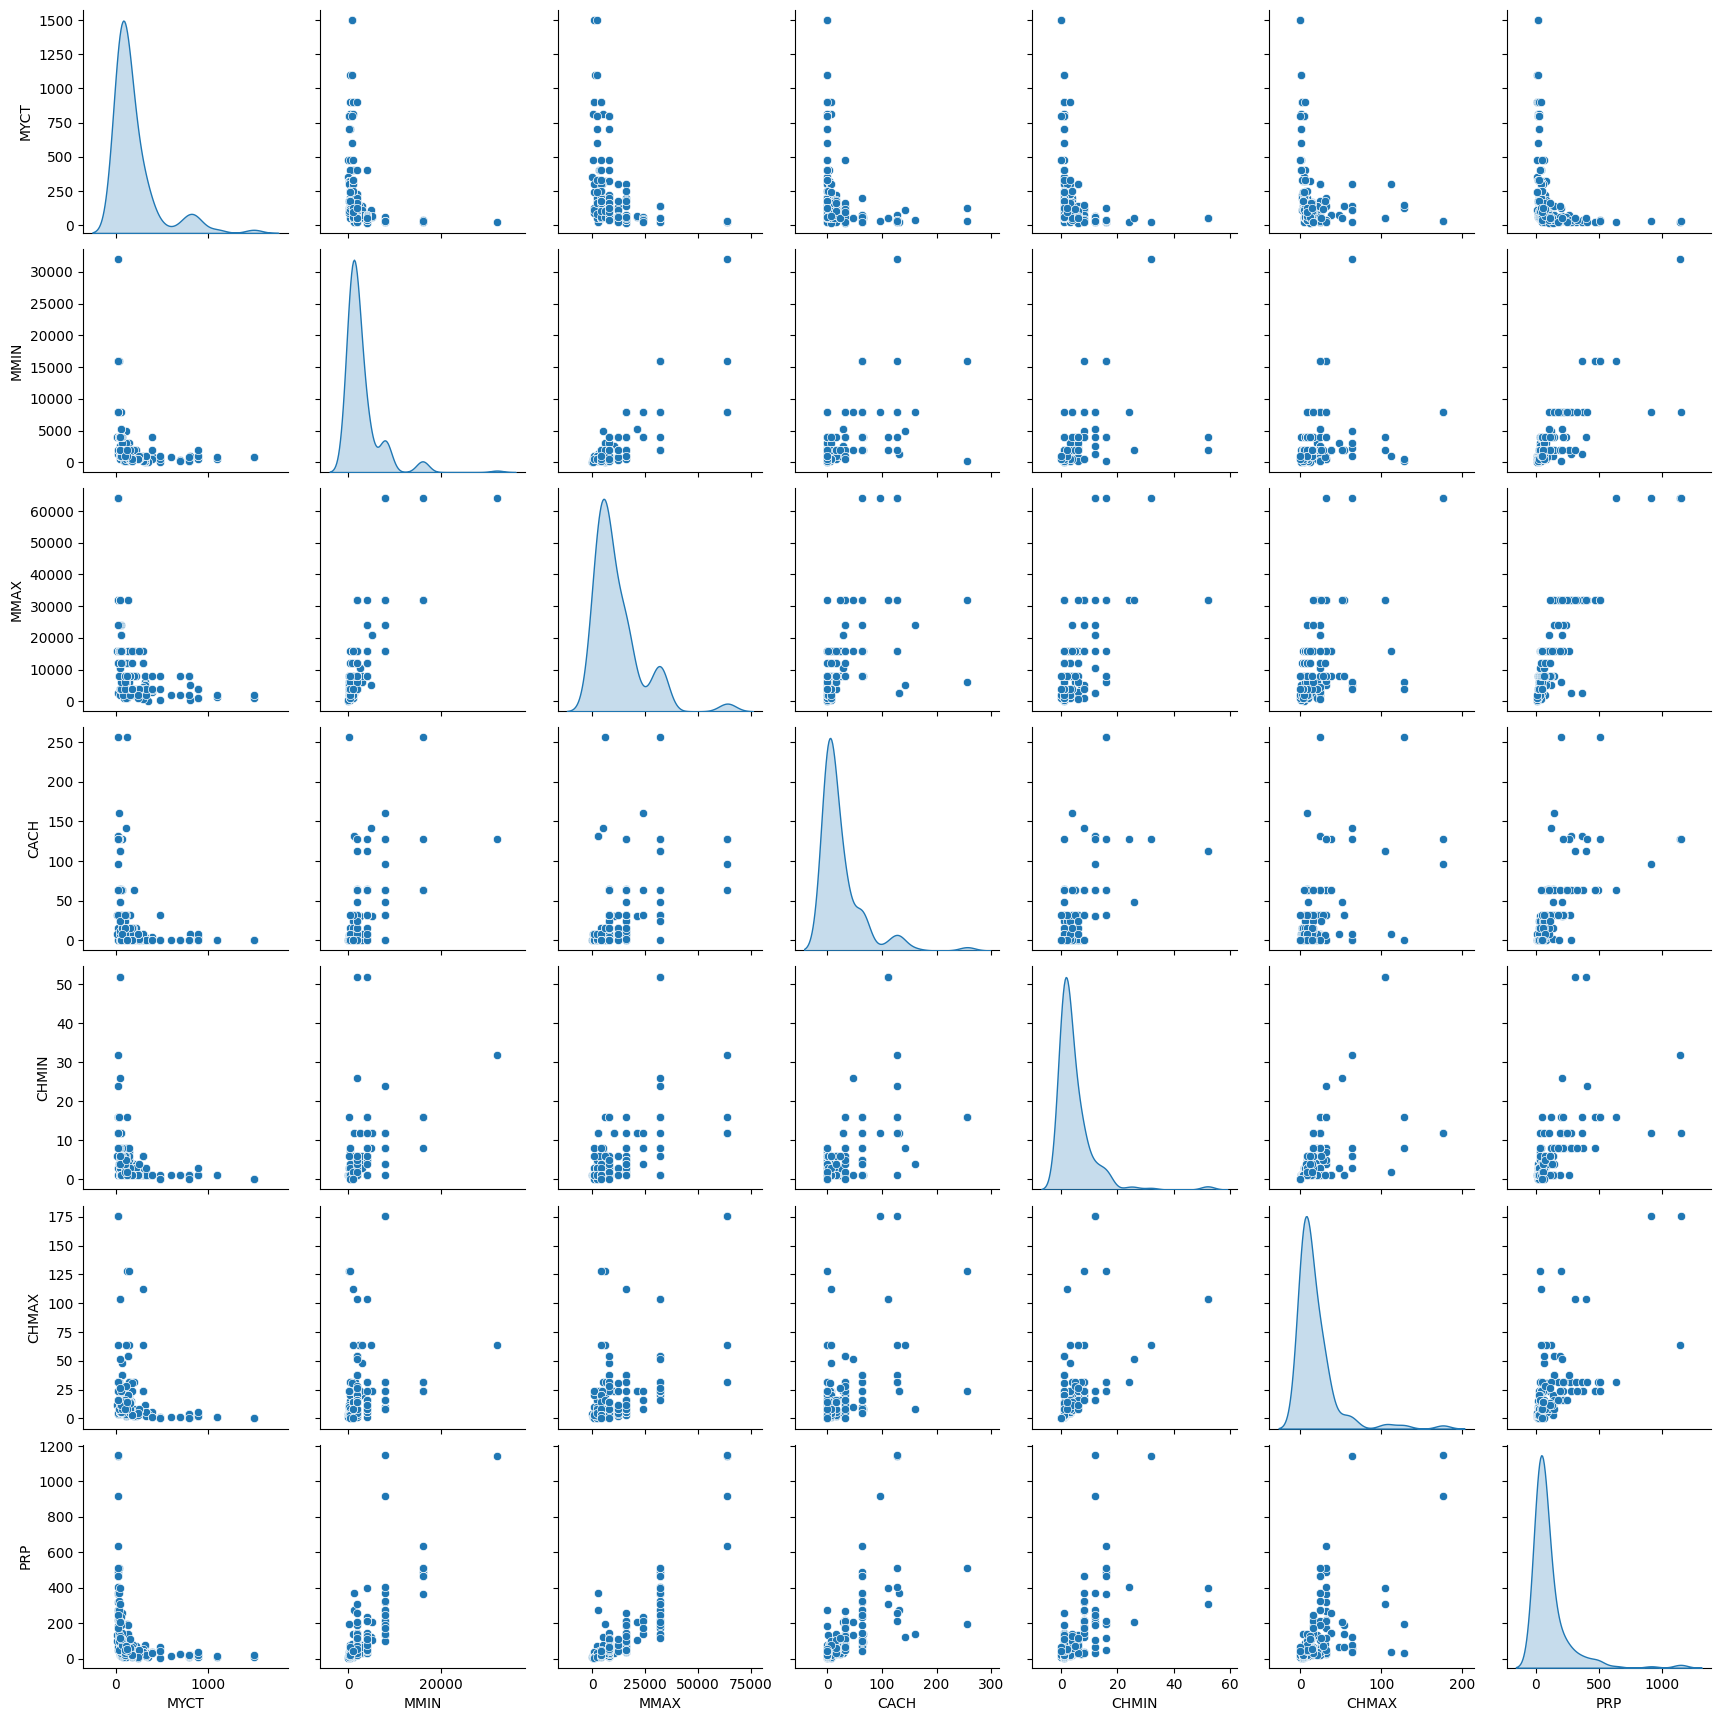

In [ ]:
# Lets visualize the data
sns.pairplot(new_dataset[['MYCT','MMIN','MMAX',
                'CACH', 'CHMIN', 'CHMAX', 'PRP']], diag_kind="kde")

## 2) NN for a simple Regression

In [ ]:
# Splitting dataset into training and testing
train, test = train_test_split(new_dataset, test_size=0.2)

# Sepparating both sets into dependent and independent variables
independent_variables = ['MYCT','MMIN','MMAX','CACH', 'CHMIN', 'CHMAX']
dependent_variables = ['ERP','PRP'] # varriables explicadas, #output de 2

train_set = train[independent_variables] #CONJUNTO DE DATOS PARA INFERIR LA VARIABLE EXPLICADA
train_target = train[dependent_variables] #el ground truth

test_set = test[independent_variables]
test_target = test[dependent_variables]

In [ ]:
train_set

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
81,300,1000,4000,8,3,64
162,56,4000,8000,0,1,8
108,900,512,1000,0,1,2
140,92,2000,8000,32,1,6
37,50,1000,4000,8,1,5
...,...,...,...,...,...,...
39,50,1000,4000,8,3,5
28,320,512,5000,4,1,5
71,75,3000,8000,8,3,48
150,40,8000,16000,32,8,16


In [ ]:
train_target

,ERP
1,253
135,88
25,21
166,80
102,18
...,...
54,30
67,20
6,381
57,34


In [ ]:
# Lets build a simple model. NOTE: this is the construction of the architecture of the model!
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(len(independent_variables), )), #mirar siempre la dimensionalidad de los inputs()
  tf.keras.layers.Dense(units=16, activation='relu'), #definir cuantas neuronas tiene una capa
  tf.keras.layers.Dense(units=16, activation='relu'),

  #LA ULTIMA CAPA DE LA RED NEURONAL, DEFINE EL PROBLEMA QUE NOSOTROS RESOLVEOS. LA FUNCION DE ACTIVACION, AFECTA LOS OUTPUTS

  # Last layer of the model and its activation function decide if it is a regression or classification problem!
  tf.keras.layers.Dense(units=len(dependent_variables), activation='linear'), #De relu a linear
  ])

# Now lets compile the model. NOTE: These are the finishing touches before having a fully functional model
model.compile(
    loss='mse',
    optimizer='adam',
    metrics=['mse', 'mae', tf.keras.metrics.RootMeanSquaredError()]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# Now lets train the model!
model.fit(train_set,            # Conjunto de datos
          train_target,         # Valores que la rn logre inferir
          epochs=15,            # Cantidad de iteraciones a hacer (numero arbitrario por ahorita)
          batch_size = 32,      # Dividir por grupos de datos, para que tengan su propia distribucion interna
          validation_split=0.2, # Porcentaje del set de entrenamiento para la validacion,
        )

#Nos interesa que valition loss esten disminuyendo.

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 339ms/step - loss: 4049004.0000 - mae: 1218.9133 - mse: 4049004.0000 - root_mean_squared_error: 2009.7775 - val_loss: 3693822.2500 - val_mae: 1031.9673 - val_mse: 3693822.2500 - val_root_mean_squared_error: 1921.9319
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2005261.0000 - mae: 915.4227 - mse: 2005261.0000 - root_mean_squared_error: 1415.0818 - val_loss: 1823544.0000 - val_mae: 742.7931 - val_mse: 1823544.0000 - val_root_mean_squared_error: 1350.3866
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 995760.4375 - mae: 665.9113 - mse: 995760.4375 - root_mean_squared_error: 992.3247 - val_loss: 868911.5000 - val_mae: 484.8704 - val_mse: 868911.5000 - val_root_mean_squared_error: 932.1542
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 353675.8125 - mae: 389.7056 - mse: 353675.8125 - root_mean_squared_error: 591.9231 - val_loss: 597149.7500 - val_mae: 370.2493 - val_mse: 597149.7500 - val_root_mean_squared_error: 772.75

In [ ]:
# Lets evaluate our model
model.evaluate(x=test_set, y=test_target, batch_size=32) # No basta con una metrica, debemos comparar modelos.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - loss: 97640.3984 - mae: 182.8736 - mse: 97640.3984 - root_mean_squared_error: 312.2165  


[91952.4140625, 91952.4140625, 179.44158935546875, 303.236572265625]

## 3) NN for multiple Regressions

In [ ]:
# Splitting dataset into training and testing
train, test = train_test_split(new_dataset, test_size=0.2)

# Sepparating both sets into dependent and independent variables
independent_variables = ['MYCT','MMIN','MMAX','CACH', 'CHMIN', 'CHMAX']
dependent_variables = ['PRP', 'ERP']

train_set = train[independent_variables]
train_target = train[dependent_variables]

test_set = test[independent_variables]
test_target = test[dependent_variables]

In [ ]:
# Lets build the model. NOTE: this is the construction of the architecture of the model!
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(len(independent_variables))),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=len(dependent_variables), activation='relu'),
  ])

# Now lets compile the model. NOTE: These are the finishing touches before having a fully functional model
model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Now lets train the model!
model.fit(train_set,
          train_target,
          epochs=10,
          batch_size = 32 ,
          validation_split=0.2
        )

In [ ]:
# Lets evaluate our model
model.evaluate(x=test_set, y=test_target, batch_size=128)

# Classification

## 1) Dataset Preparations

In [4]:
'''
All the information regarding the dataset used for this demo can be found in the following link:
https://archive.ics.uci.edu/ml/datasets/Iris
'''

# Getting Dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2025-02-05 02:13:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.data’

iris.data               [ <=>                ]   4.44K  --.-KB/s    in 0s      

2025-02-05 02:13:35 (84.3 MB/s) - ‘iris.data’ saved [4551]



In [5]:
# Loading Dataset and have a glimpse about it
column_names = ['sepal_length','sepal_width','petal_length','petal_width', 'class']

raw_dataset = pd.read_csv("iris.data", names=column_names,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

# Brief Statistical Summary of the dataset
raw_dataset.describe()

NameError: name 'pd' is not defined

In [2]:
# Lets check columns
raw_dataset.columns

NameError: name 'raw_dataset' is not defined

In [1]:
# Summary of the dataset
raw_dataset.head()

NameError: name 'raw_dataset' is not defined

In [ ]:
# Returns a form of (# rows, # columns)
raw_dataset.shape #150 datos con 5 columnas

(150, 5)

In [ ]:
# Lets make a copy
new_dataset = raw_dataset.copy()

# Lets check for null values
# df.dropna()
print(new_dataset.isna().sum())

# Dropping null rows
new_dataset = new_dataset.dropna()

# Checking new dataset
new_dataset.head()

In [ ]:
# Lets visualize the data
sns.pairplot(new_dataset[['sepal_length','sepal_width','petal_length','petal_width']], diag_kind="kde")

In [ ]:
# Splitting dataset into training and testing
train, test = train_test_split(new_dataset, test_size=0.2)

# Sepparating both sets into dependent and independent variables
independent_variables = list(raw_dataset.columns)
independent_variables.remove('class')
dependent_variables = ['class']

train_set = train[independent_variables]
train_target = train[dependent_variables]

test_set = test[independent_variables]
test_target = test[dependent_variables]

In [ ]:
train_target, test_target

In [ ]:
# NNs can't understand strings, we have to ENCODE them! (more next class)
train_target = pd.factorize(train_target['class'])[0]
test_target = pd.factorize(test_target['class'])[0]

In [ ]:
train_target, test_target

## 2) NN for Classification

In [ ]:
# Lets build the model. NOTE: this is the construction of the architecture of the model!
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(len(independent_variables))),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax')
  ])

# Now lets compile the model. NOTE: These are the finishing touches before having a fully functional model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Now lets train the model!
model.fit(train_set,
          train_target,
          epochs=25,
          batch_size = 128,
          validation_split=0.2
        )

In [ ]:
# Lets evaluate our model
model.evaluate(x=test_set, y=test_target, batch_size=128)

In [ ]:
test_target

In [ ]:
# Function that plots confusion matrix
def plot_confusion_matrix(labels, predictions):
  figure = plt.figure(figsize=(4, 4))
  sns.heatmap(confusion_matrix(labels=labels, predictions=predictions), annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

# Confusion Matrix
predictions = list(map(lambda x: np.argmax(x), model.predict(test_set)))

plot_confusion_matrix(labels=test_target, predictions=predictions)

# Generation

## 1) Data Preparations

In [ ]:
import itertools
from keras.preprocessing import image

IMG_HEIGHT = 512
IMG_WIDTH = 256

img_rows = [(i-(IMG_WIDTH/2))/(IMG_WIDTH/2) for i in range(IMG_WIDTH)]
img_cols = [(j-(IMG_HEIGHT/2))/(IMG_HEIGHT/2) for j in range(IMG_HEIGHT)]

flatten_image = np.array(list(itertools.product(img_rows, img_cols)))

## 2) NN for Generation

In [ ]:
# Creating a custom Layer
class ScaleLayer(tf.keras.layers.Layer):
  def __init__(self, redScale=255.0, greenScale=255.0, blueScale=255.0):
    super(ScaleLayer, self).__init__()
    self.scale = tf.constant([redScale, greenScale, blueScale], dtype=tf.float32)

  def call(self, inputs):
    outputs = tf.dtypes.cast(inputs, tf.float32)
    outputs = outputs * self.scale
    return tf.dtypes.cast(outputs, tf.uint8)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(2, )),
  tf.keras.layers.Dense(units=128, activation='tanh', kernel_constraint=tf.keras.constraints.MaxNorm(max_value=4), kernel_initializer=tf.keras.initializers.RandomUniform(minval=-4, maxval=4)),
  tf.keras.layers.Dense(units=256, activation='tanh', kernel_constraint=tf.keras.constraints.MaxNorm(max_value=4), kernel_initializer=tf.keras.initializers.RandomUniform(minval=-4, maxval=4)),
  tf.keras.layers.Dense(units=512, activation='tanh', kernel_constraint=tf.keras.constraints.MaxNorm(max_value=4), kernel_initializer=tf.keras.initializers.RandomUniform(minval=-4, maxval=4)),
  tf.keras.layers.Dense(units=3, activation='sigmoid', kernel_initializer=tf.keras.initializers.random_normal()),
  ScaleLayer(redScale=0, greenScale=255, blueScale=0)
  ])

generated_image = np.reshape(np.array(model(flatten_image)), newshape=(IMG_WIDTH, IMG_HEIGHT, 3))

plt.figure(figsize=(8, 8))
plt.imshow(image.array_to_img(generated_image))
plt.axis("off")